-------------- Pixels de l'image X --------------


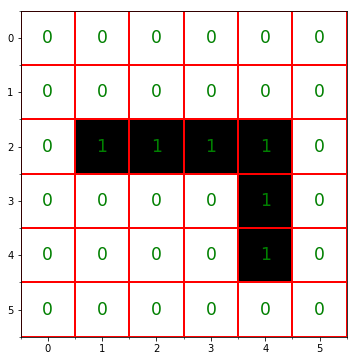

-------------- Pixels du filtre F --------------


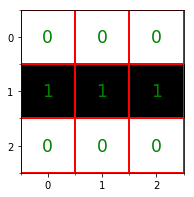

-------------- Pixels du résultat de la corrélation pareille Y --------------


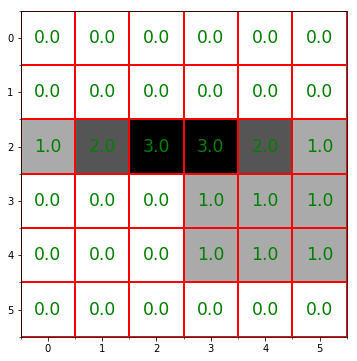

In [1]:
%matplotlib inline
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def afficher_pixels(image):
    """ Afficher les pixels d'une image.
    image : tableau 2d de pixels
    """
    largeur, hauteur = image.shape
    plt.figure(figsize=(largeur, hauteur))
    im = plt.imshow(image,interpolation='none',cmap = mpl.cm.binary)
    ax = plt.gca()
    # Graduation majeure pour les axes
    ax.set_xticks(np.arange(0, largeur, 1))
    ax.set_yticks(np.arange(0, hauteur, 1))
    # Etiquettes de graduation
    ax.set_xticklabels(np.arange(0, largeur, 1));
    ax.set_yticklabels(np.arange(0, hauteur, 1));
    # Graduations mineures
    ax.set_xticks(np.arange(-.5, largeur, 1), minor=True);
    ax.set_yticks(np.arange(-.5, hauteur, 1), minor=True);

    # Quadrillage pour délimiter les pixels
    ax.grid(which='minor', color='r', linestyle='-', linewidth=2)

    for i in range(largeur):
        for j in range(hauteur):
            text = ax.text(j, i,image[i, j],ha="center", va="center", color="g",fontsize="xx-large")
            
    plt.show()
    
def correlation_pareille(X,F):
    """ Calculer la corrélation discrète pareille entre X et F
    X : np.array 2d
    F : np.array 2d de taille inférieure à X, taille impaire par hypothèse """

    X_plus_bordure = np.vstack((np.zeros((np.int((F.shape[0]-1)/2),X.shape[1])),
                                X,np.zeros((np.int((F.shape[0]-1)/2),X.shape[1]))))
    X_plus_bordure = np.hstack((np.zeros((X_plus_bordure.shape[0],np.int((F.shape[1]-1)/2))),
                                X_plus_bordure,np.zeros((X_plus_bordure.shape[0],np.int((F.shape[1]-1)/2)))))
    largeur_Y = X_plus_bordure.shape[0]-F.shape[0]+1
    hauteur_Y = X_plus_bordure.shape[1]-F.shape[1]+1
    Y=np.zeros((largeur_Y,hauteur_Y))
    for i in range(largeur_Y):
        for j in range(hauteur_Y):
            Y[i,j] = np.sum(X_plus_bordure[i:i+F.shape[0],j:j+F.shape[1]]*F)
    return Y

X =np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,1,1,1,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,0,0]])
    
print("-------------- Pixels de l'image X --------------")        
afficher_pixels(X)

F =np.array([[0,0,0],[1,1,1],[0,0,0]])
print("-------------- Pixels du filtre F --------------")
afficher_pixels(F)

Y=correlation_pareille(X,F)
print("-------------- Pixels du résultat de la corrélation pareille Y --------------")
afficher_pixels(Y)

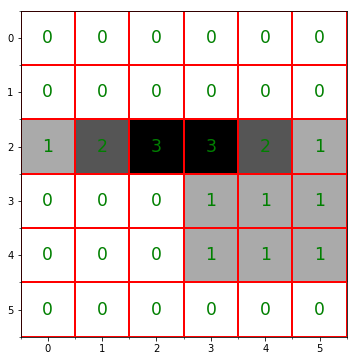

In [2]:
from scipy import signal
Y=signal.correlate2d(X, F, 'same')
afficher_pixels(Y)